In [69]:
import pandas as pd 
import numpy as np 
import matplotlib as plt
from matplotlib import pyplot
import seaborn as sns
import matplotlib.pyplot as plt
import dabl
from sklearn.model_selection import train_test_split


In [70]:
# Cargamos datos
data = pd.read_csv("pinguinos.csv")
data.head(10)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


In [71]:
# En este ejercicio no vamos a imputar datos nulos, solo con lo que esta lleno
data = data.dropna()
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [72]:
data.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,FEMALE
13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,MALE
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,MALE


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


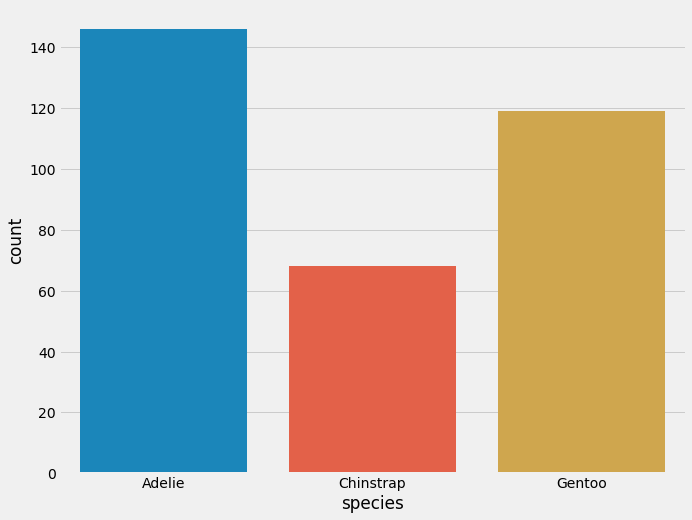

In [73]:
plt.figure(figsize = (10, 8))
sns.countplot(data['species'])
plt.show()

In [74]:
# Creo el diccionario para etiquetar el especie de pinguino
mappings = {'Adelie':'1', 'Gentoo':'2','Chinstrap':'3'}
data['species'] = data['species'].replace(mappings)
data['species'] = data['species'].astype('int')
assert data['species'].dtype == 'int'
print(data['species'].describe())
data.head(10)

count    333.000000
mean       1.765766
std        0.767820
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        3.000000
Name: species, dtype: float64


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,1,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,1,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,1,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,1,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,1,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,1,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,1,Torgersen,39.2,19.6,195.0,4675.0,MALE
12,1,Torgersen,41.1,17.6,182.0,3200.0,FEMALE
13,1,Torgersen,38.6,21.2,191.0,3800.0,MALE
14,1,Torgersen,34.6,21.1,198.0,4400.0,MALE


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


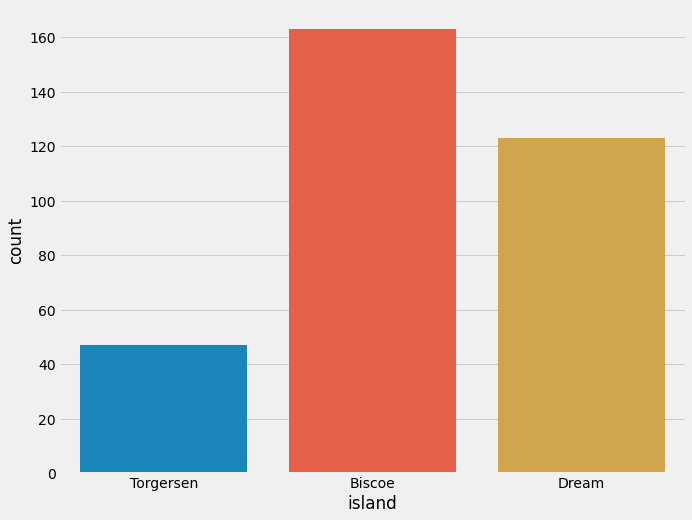

In [75]:
plt.figure(figsize = (10, 8))
sns.countplot(data['island'])
plt.show()

In [76]:
# Creo el diccionario para etiquetar la isla de pinguino
mappings = {'Biscoe':'1', 'Dream':'2','Torgersen':'3'}
data['island'] = data['island'].replace(mappings)
data['island'] = data['island'].astype('int')
assert data['island'].dtype == 'int'
print(data['island'].describe())
data.head(10)

count    333.000000
mean       1.651652
std        0.714715
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        3.000000
Name: island, dtype: float64


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,1,3,39.1,18.7,181.0,3750.0,MALE
1,1,3,39.5,17.4,186.0,3800.0,FEMALE
2,1,3,40.3,18.0,195.0,3250.0,FEMALE
4,1,3,36.7,19.3,193.0,3450.0,FEMALE
5,1,3,39.3,20.6,190.0,3650.0,MALE
6,1,3,38.9,17.8,181.0,3625.0,FEMALE
7,1,3,39.2,19.6,195.0,4675.0,MALE
12,1,3,41.1,17.6,182.0,3200.0,FEMALE
13,1,3,38.6,21.2,191.0,3800.0,MALE
14,1,3,34.6,21.1,198.0,4400.0,MALE


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


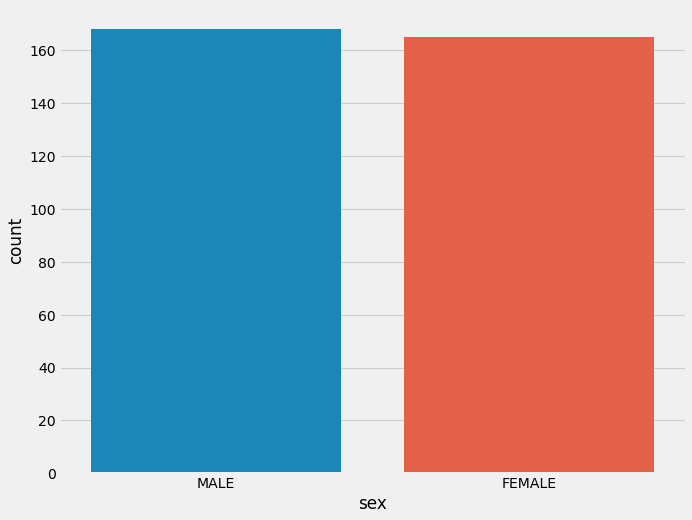

In [77]:
plt.figure(figsize = (10, 8))
sns.countplot(data['sex'])
plt.show()

In [78]:
# Creo etiqueta para sexo de pinguino -1 Masculino , 1 femenino
data['sex']= data['sex'].apply(lambda x:-1 if x=='MALE' else 1)
print(data['sex'].describe())
data.head(10)


count    333.000000
mean      -0.009009
std        1.001464
min       -1.000000
25%       -1.000000
50%       -1.000000
75%        1.000000
max        1.000000
Name: sex, dtype: float64


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,1,3,39.1,18.7,181.0,3750.0,-1
1,1,3,39.5,17.4,186.0,3800.0,1
2,1,3,40.3,18.0,195.0,3250.0,1
4,1,3,36.7,19.3,193.0,3450.0,1
5,1,3,39.3,20.6,190.0,3650.0,-1
6,1,3,38.9,17.8,181.0,3625.0,1
7,1,3,39.2,19.6,195.0,4675.0,-1
12,1,3,41.1,17.6,182.0,3200.0,1
13,1,3,38.6,21.2,191.0,3800.0,-1
14,1,3,34.6,21.1,198.0,4400.0,-1


In [79]:
data.info() 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    int32  
 1   island             333 non-null    int32  
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    int64  
dtypes: float64(4), int32(2), int64(1)
memory usage: 18.2 KB


In [80]:
#Cabecera Final
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,1,3,39.1,18.7,181.0,3750.0,-1
1,1,3,39.5,17.4,186.0,3800.0,1
2,1,3,40.3,18.0,195.0,3250.0,1
4,1,3,36.7,19.3,193.0,3450.0,1
5,1,3,39.3,20.6,190.0,3650.0,-1


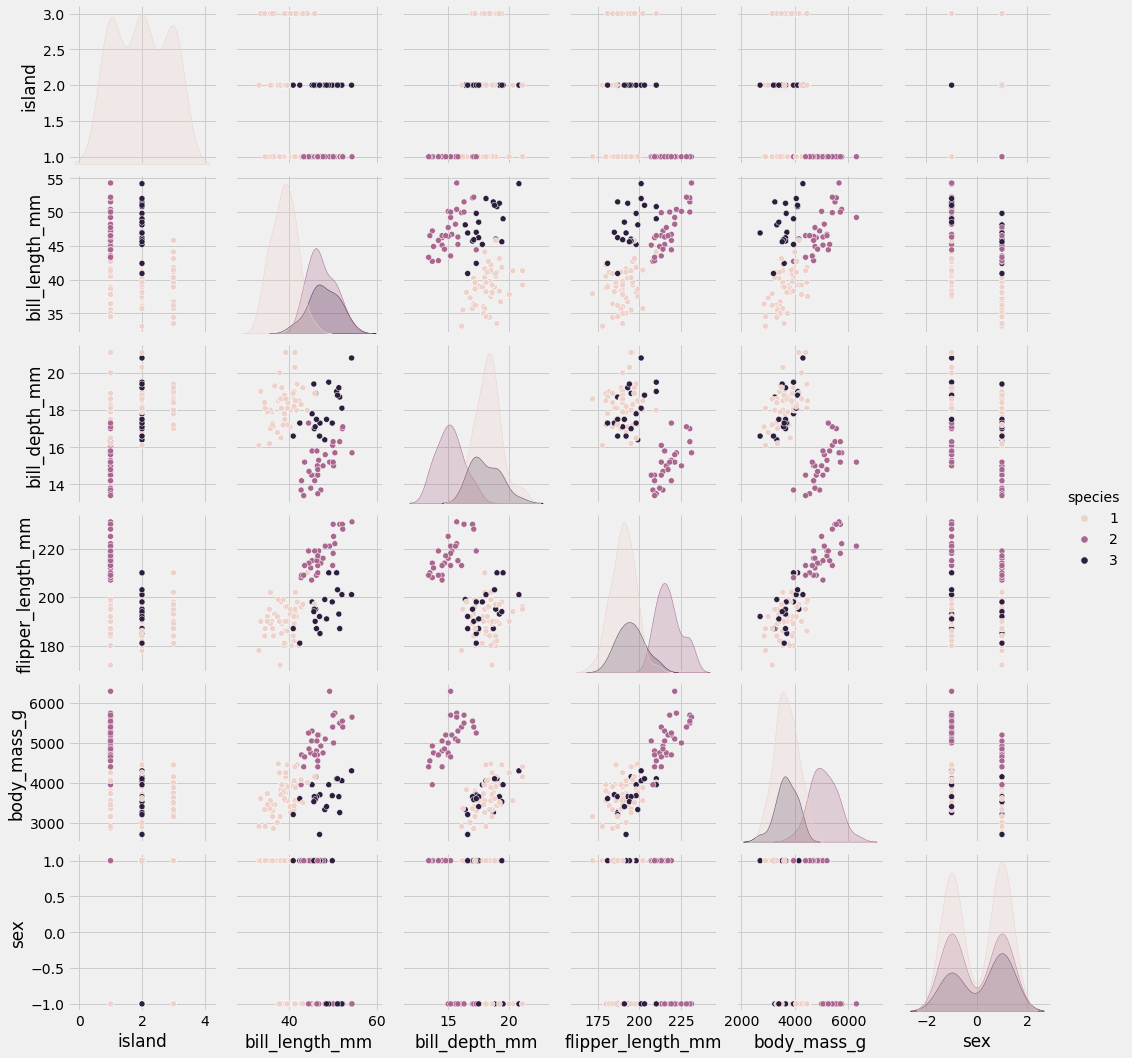

In [81]:
# Exploración de la relación entre variables
sns.pairplot(
   data.sample(100), hue="species"
); # ploteamos sobre una muestra para no cargar demasiado la memoria

Target looks like classification
Linear Discriminant Analysis training set score: 0.983


c:\ProgramData\Anaconda3\lib\site-packages\dabl\plot\utils.py:374: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(
c:\ProgramData\Anaconda3\lib\site-packages\dabl\plot\utils.py:374: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(


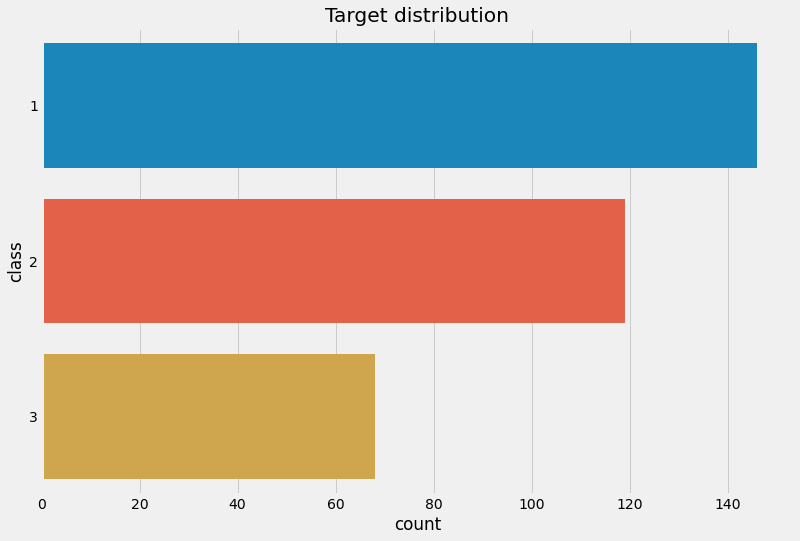

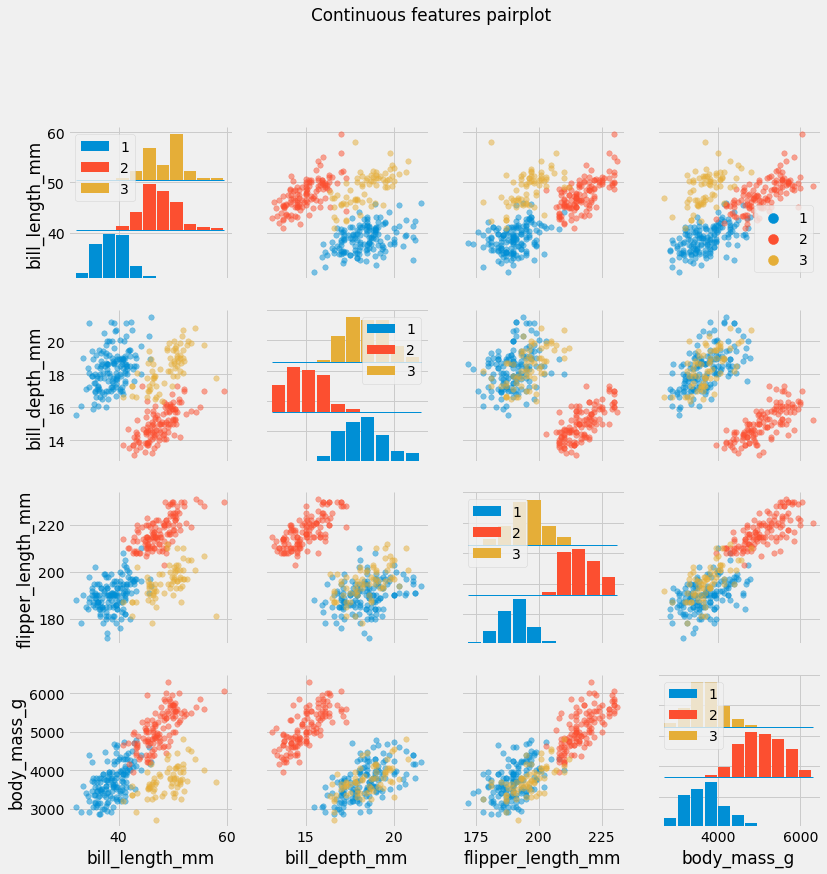

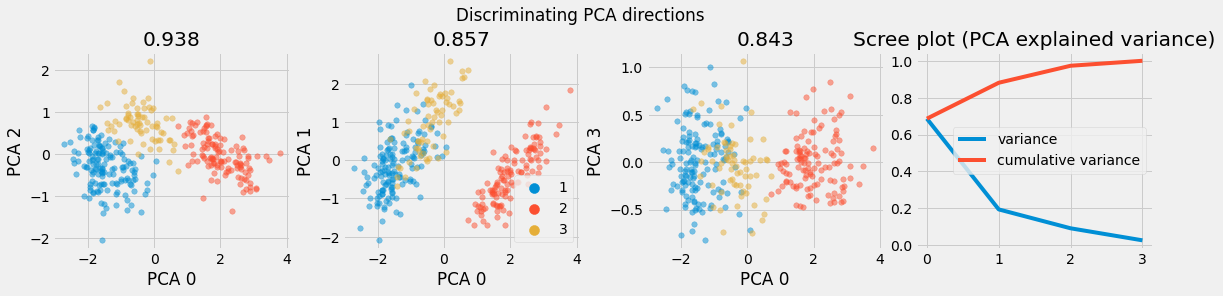

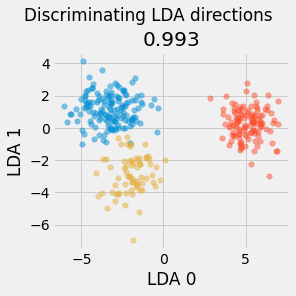

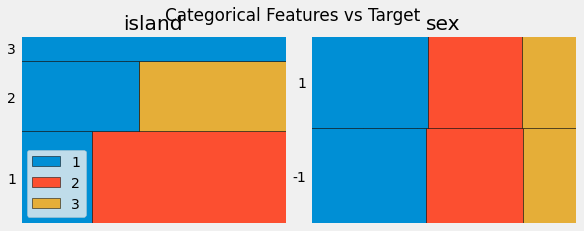

In [82]:
# DABL
plt.rcParams['figure.figsize'] = (12, 8)
plt.style.use('fivethirtyeight')
dabl.plot(data, target_col='species')
plt.show();

In [83]:
#Set de Entrenamiento y prueba
TARGET = 'species'
# Variables predictoras
X = data.loc[:, data.columns != TARGET]
# Variable objetivo
y = data[TARGET].values

# Realizamos el Split utilizando la función de sklearn
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42,stratify=y
)